<a href="https://colab.research.google.com/github/asrivastava0601/JanataHack-Computer-Vision-Hackathon/blob/master/AV_fastai_try01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
# Required to run the fastai based methods. They do not work on pytorch 1.5 which is by default in google colab.
!pip install "torch==1.4" "torchvision==0.5.0" 

     |████████████████████████████████| 753.4MB 21kB/s 
     |████████████████████████████████| 4.0MB 38.4MB/s 
  Found existing installation: torch 1.5.0+cu101
    Uninstalling torch-1.5.0+cu101:
      Successfully uninstalled torch-1.5.0+cu101
  Found existing installation: torchvision 0.6.0+cu101
    Uninstalling torchvision-0.6.0+cu101:
      Successfully uninstalled torchvision-0.6.0+cu101


In [0]:
import numpy as np
import pandas as pd

import os
import random
import shutil as sh

import matplotlib.pyplot as plt

import fastai
from fastai.vision import *

In [0]:
from torchvision import models

In [0]:
import torch

In [0]:
train_data = pd.read_csv("/content/gdrive/My Drive/Analytics_Vidya_DL/train/train.csv")

In [7]:
train_data.head()

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0


In [0]:
train_data['image_names'] = 'train/images/' + train_data['image_names'].astype(str)

In [9]:
train_data.head()

,image_names,emergency_or_not
0,train/images/1503.jpg,0
1,train/images/1420.jpg,0
2,train/images/1764.jpg,0
3,train/images/1356.jpg,0
4,train/images/1117.jpg,0


In [0]:
path = '/content/gdrive/My Drive/Analytics_Vidya_DL/'

tfms = get_transforms(do_flip=True)

training_data = ImageDataBunch.from_df(path, train_data, label_col= 'emergency_or_not' , ds_tfms= tfms , valid_pct= 0.2, bs = 64, size= 150, seed = 42).normalize()

In [11]:
print("Class labels:",training_data.classes)

Class labels: [0, 1]


In [12]:
print("\n Number of classes: ",training_data.c)


 Number of classes:  2


In [13]:
len(training_data.train_ds), len(training_data.valid_ds)

(1317, 329)

In [14]:
print("\nSample images in a batch:")
training_data.show_batch(rows=5, figsize=(8, 8))


Sample images in a batch:


In [0]:
test_df = pd.read_csv("/content/gdrive/My Drive/Analytics_Vidya_DL/test_vc2kHdQ.csv")

In [16]:
test_df.head()

,image_names
0,1960.jpg
1,668.jpg
2,2082.jpg
3,808.jpg
4,1907.jpg


In [0]:
test_path = "/content/gdrive/My Drive/Analytics_Vidya_DL/train/images/"

In [0]:
## Lets add the test dataset for the predictions.
test_data = ImageList.from_df(test_df, test_path)

In [0]:
training_data.add_test(test_data)

In [20]:
## Pre-trained ResNet101 would be fit for this task, having previous weights. As it has already been trained on millions of images.
model_resnet101 = cnn_learner(training_data, models.resnet101, metrics = [error_rate,accuracy], pretrained = True)

#model_resnet101.summary()

model_resnet101.fit_one_cycle(10)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.612794,0.522135,0.112462,0.887538,02:48
1,0.484110,0.472263,0.124620,0.875380,00:10
2,0.410029,0.387751,0.106383,0.893617,00:09
3,0.353941,0.366457,0.103343,0.896657,00:09
4,0.282746,0.292709,0.097264,0.902736,00:09
5,0.229312,0.270254,0.088146,0.911854,00:09
6,0.188419,0.264226,0.088146,0.911854,00:09
7,0.158224,0.265492,0.088146,0.911854,00:09
8,0.137168,0.269566,0.085106,0.914894,00:09
9,0.120954,0.265147,0.088146,0.911854,00:09


In [0]:
# Lets findout the optimum learning rate to be used for training the model.
#model_resnet101.lr_find(stop_div=False, num_it= 25)

In [0]:
#model_resnet101.recorder.plot(suggestion=True)

In [0]:
#optimum_lr = model_resnet101.recorder.min_grad_lr
#print("\n Optimum learning rate to be used: ", optimum_lr)

Text(0.5, 1.0, 'Confusion Matrix: Model_resnet101')

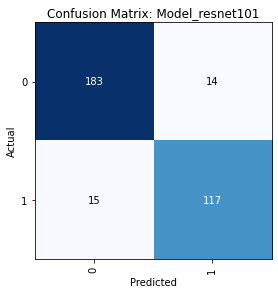

In [24]:
## We can stop at the epoch 6, as the accuracy does not increase further and the model just overfits the training data.
cm1 = ClassificationInterpretation.from_learner(model_resnet101)
cm1.plot_confusion_matrix()
plt.title("Confusion Matrix: Model_resnet101")

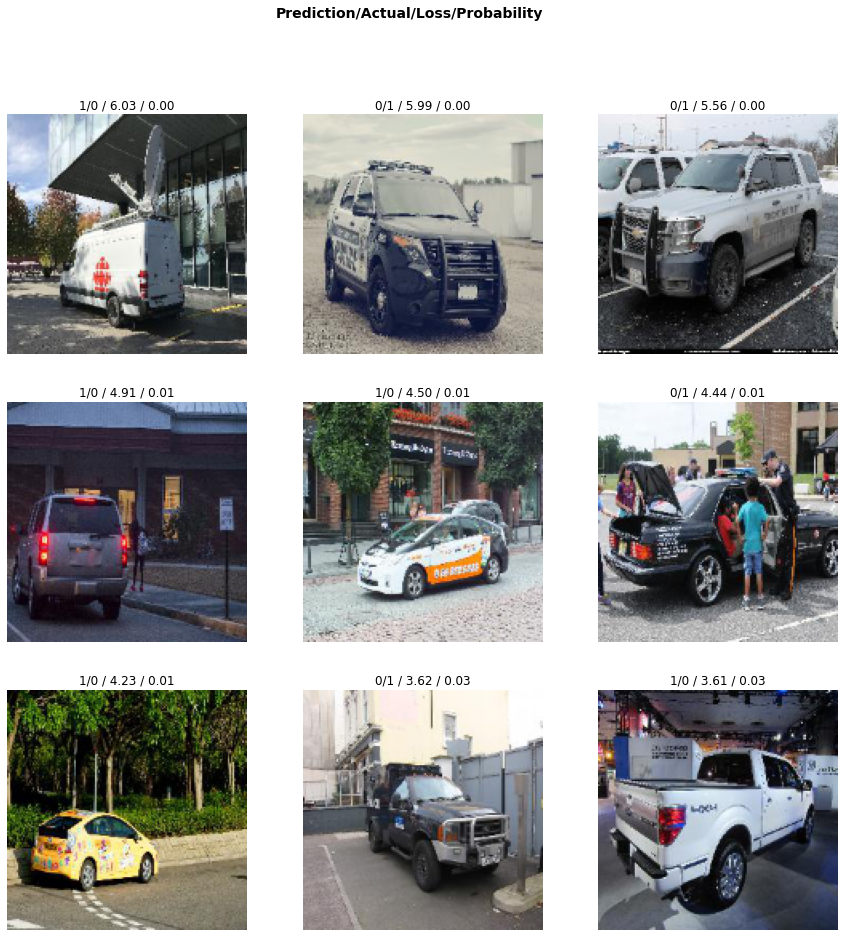

In [25]:
# Lets see the top losses, i.e. which images confused the model.
cm1.plot_top_losses(9, figsize=(15,15))

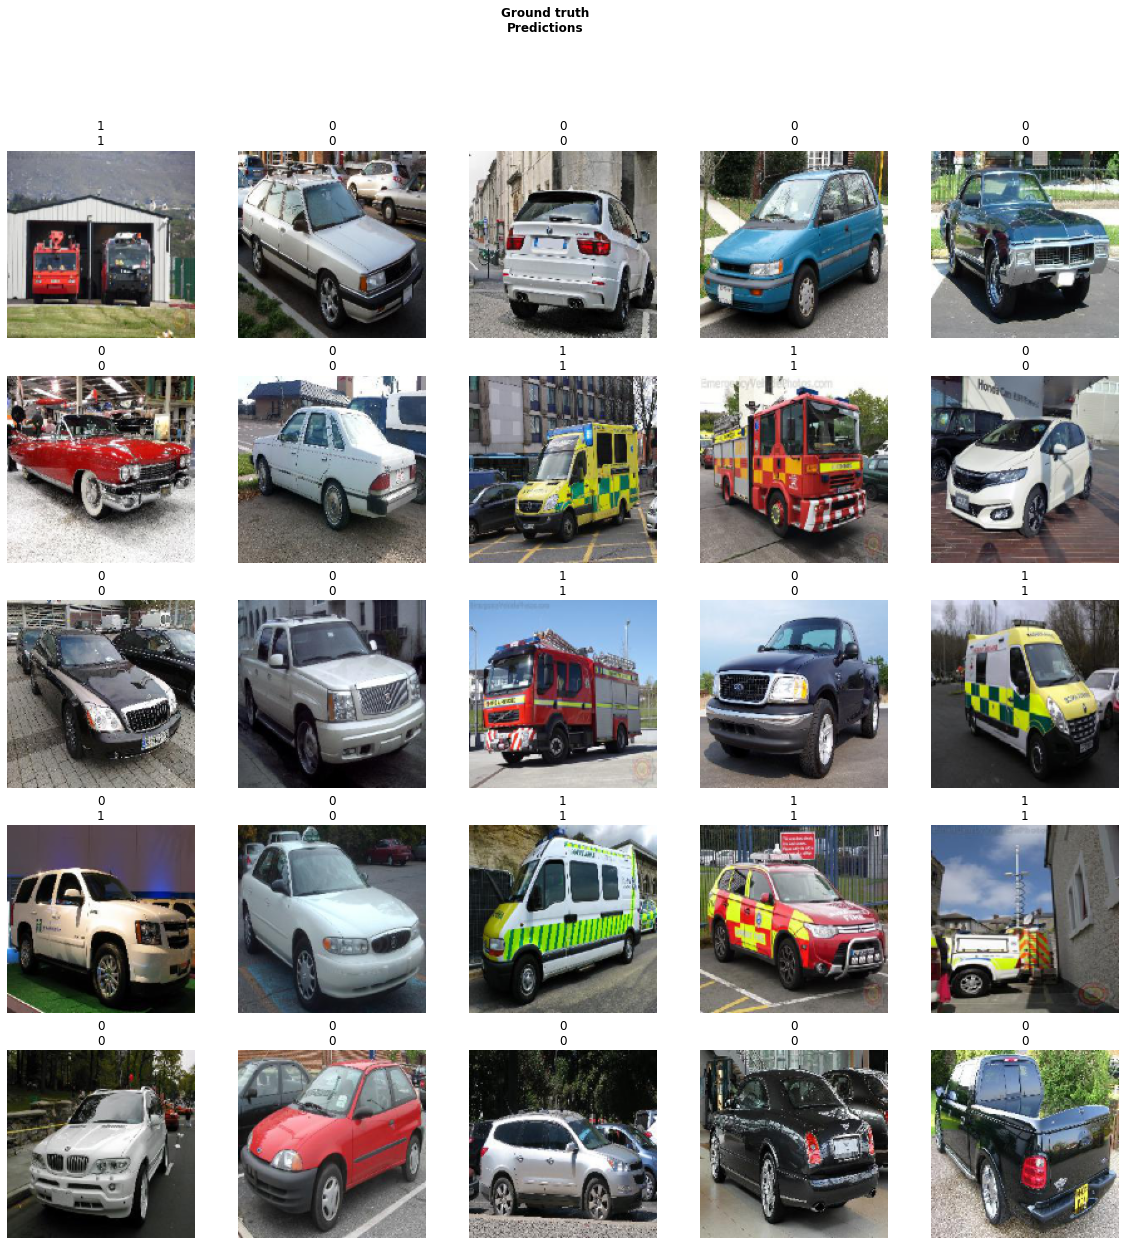

In [26]:
# Lets see the some of the results for the predictions.
model_resnet101.show_results()

In [26]:
# Lets make predictions on the test dataset.
predictions, *_ = model_resnet101.get_preds(DatasetType.Test)

In [0]:
labels = np.argmax(predictions, 1)

In [0]:
test_df['emergency_or_not'] = labels

In [31]:
test_df.head(10)

,image_names,emergency_or_not
0,1960.jpg,0
1,668.jpg,1
2,2082.jpg,0
3,808.jpg,1
4,1907.jpg,0
5,350.jpg,1
6,1557.jpg,0
7,111.jpg,1
8,1952.jpg,0
9,1466.jpg,0


In [0]:
test_df.to_csv("/content/gdrive/My Drive/Analytics_Vidya_DL/Solution01.csv", index= False)